# Diabetes Prediction 
# ENEL 645 Team 13
### Winter 2021

      
## 1. Importing Python Libraries

In [1]:
#importing libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import tensorflow as tf
from pandas import DataFrame as df
import seaborn as sns

## 2. Data Loading and Data exploration

In [38]:
#importing data
data = pd.read_csv('diabetes_csv.csv')
X = data.iloc[:, :-1].values
Y = data.iloc[:, 8].values
print(data.head())

   preg  plas  pres  skin  insu  mass   pedi  age            class
0     6   148    72    35     0  33.6  0.627   50  tested_positive
1     1    85    66    29     0  26.6  0.351   31  tested_negative
2     8   183    64     0     0  23.3  0.672   32  tested_positive
3     1    89    66    23    94  28.1  0.167   21  tested_negative
4     0   137    40    35   168  43.1  2.288   33  tested_positive


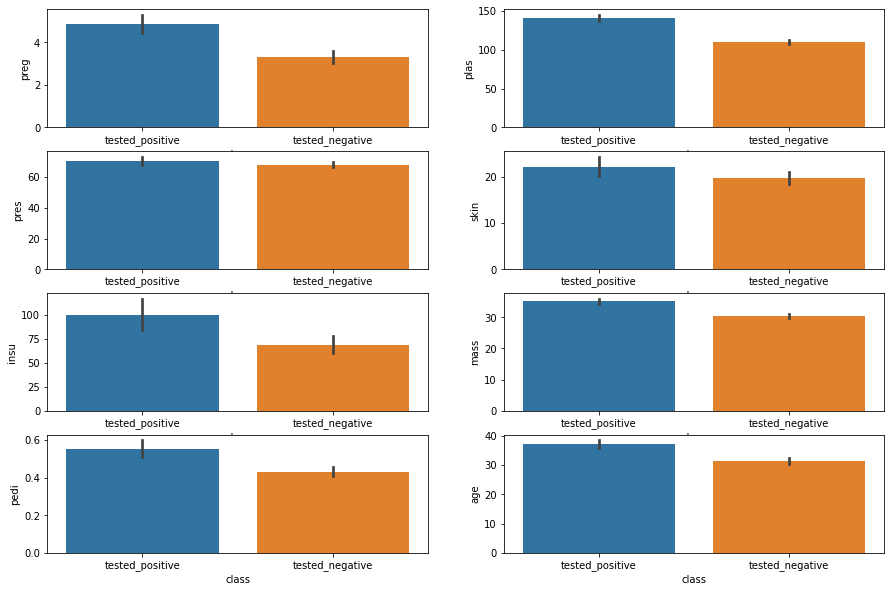

<Figure size 432x288 with 0 Axes>

In [39]:
#comparision of features with labels
plt.figure(figsize=(15,10))
plt.subplot(4,2,1)
sns.barplot(x= 'class',y='preg',data=data)
plt.subplot(4,2,2)
sns.barplot(x= 'class',y='plas',data=data)
plt.subplot(4,2,3)
sns.barplot(x= 'class',y='pres',data=data)
plt.subplot(4,2,4)
sns.barplot(x= 'class',y='skin',data=data)
plt.subplot(4,2,5)
sns.barplot(x= 'class',y='insu',data=data)
plt.subplot(4,2,6)
sns.barplot(x= 'class',y='mass',data=data)
plt.subplot(4,2,7)
sns.barplot(x= 'class',y='pedi',data=data)
plt.subplot(4,2,8)
sns.barplot(x= 'class',y='age',data=data)
plt.show()
plt.tight_layout()

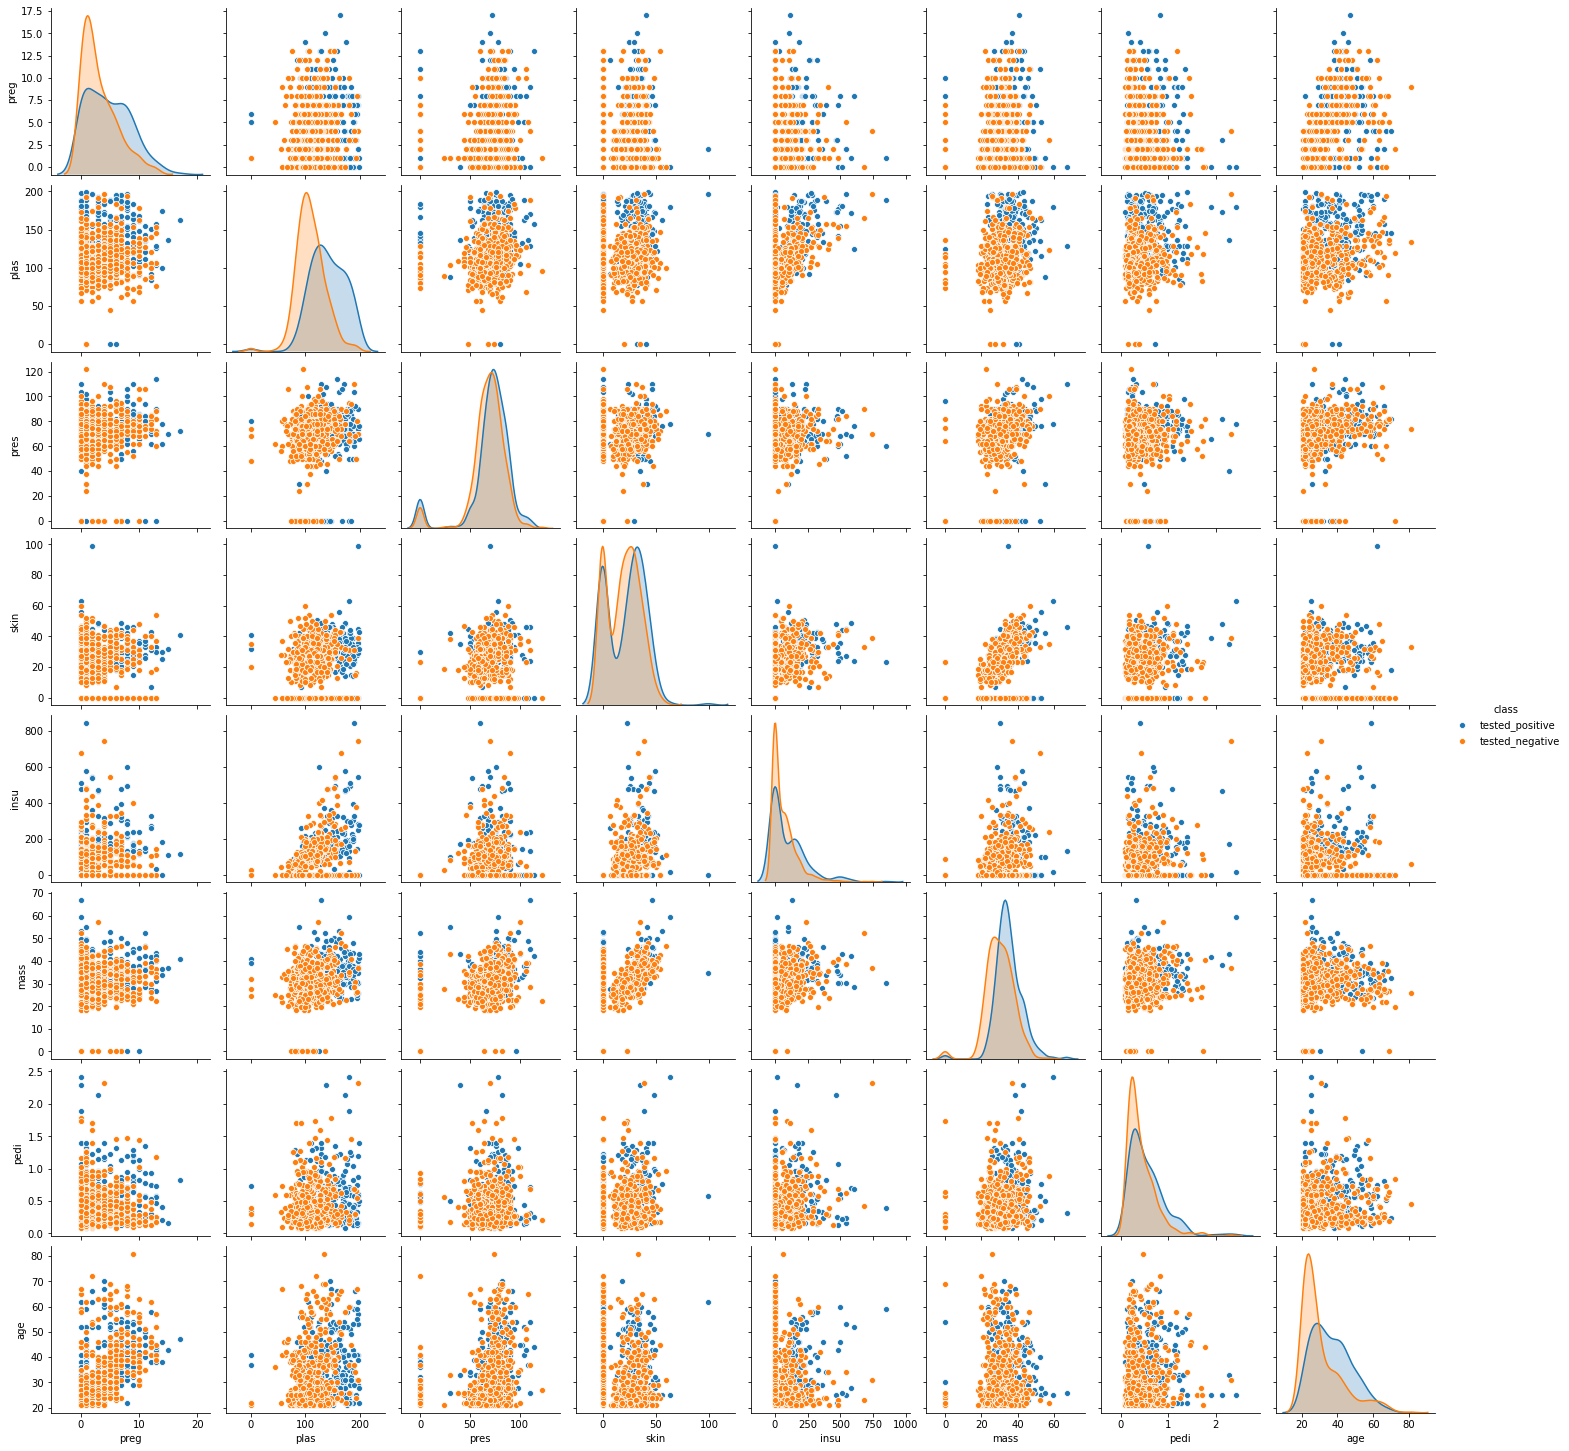

In [4]:
#from above we can say that blood pressure is not significant for diagnistic the Diabetes
sns.pairplot(data,hue='class')

In [40]:
#cleaning the data
Y= pd.get_dummies(Y,drop_first=True)
print('Labels:\n',Y.head())
print("Number of unique label: ",np.unique(Y).size)
#Where Tested positive is 0 then it means person is tested negative

Labels:
    tested_positive
0                1
1                0
2                1
3                0
4                1
Number of unique label:  2


## 3. Train, Validation and Test Split of data and One hot encoding

In [41]:
#Train, Validation and test set split
nsplit1 = int(0.75*X.shape[0])
nsplit2 = int(0.90*X.shape[0])
X_train = X[:nsplit1]
Y_train = Y[:nsplit1]

X_val = X[nsplit1:nsplit2]
Y_val = Y[nsplit1:nsplit2]

X_test = X[nsplit2:]
Y_test = Y[nsplit2:]

print("Train Set:")
print("\tShape of Train data: ",X_train.shape)
print("\tLabels in train set: ",Y_train.shape)
print("Validation Set:")
print("\tShape of Validation Data: ",X_val.shape)
print("\tLabels in validation set: ",Y_val.shape)
print("Test Set:")
print("\tShape of Test Data: ",X_test.shape)
print("\tLabels in test set: ",Y_test.shape)

Train Set:
	Shape of Train data:  (576, 8)
	Labels in train set:  (576, 1)
Validation Set:
	Shape of Validation Data:  (115, 8)
	Labels in validation set:  (115, 1)
Test Set:
	Shape of Test Data:  (77, 8)
	Labels in test set:  (77, 1)


In [42]:
# One hot encoding
k = np.unique(Y).size
Y_train_oh = tf.keras.utils.to_categorical(Y_train,k)
Y_val_oh = tf.keras.utils.to_categorical(Y_val,k)
Y_test_oh = tf.keras.utils.to_categorical(Y_test,k)
print("Original Labels:")
print(Y_train[:5])
print()
print("One hot encoded labels:")
print(Y_train_oh[:5])

Original Labels:
   tested_positive
0                1
1                0
2                1
3                0
4                1

One hot encoded labels:
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]


## 4. Noramlization

In [43]:
# Min-Max Normalization - normalizing inputs from 0-255 to 0.0-1.0 
#X_train = X_train.astype('float32') 
#X_test = X_test.astype('float32') 
#X_train = X_train / 255.0 
#X_test = X_test / 255.0

#We tried Min-Max and Standardization Data scaling. However, the result with the later is good.Hence, finally we considered it.

# Standardization
train_mean, train_std = X_train.mean(),X_train.std() 
X_train = (X_train - train_mean)/train_std
X_val = (X_val - train_mean)/train_std
X_test = (X_test - train_mean)/train_std

## 5. Modelling

In [44]:
def my_model(k,learning_rate = 0.15):
    inputs = tf.keras.layers.Input(shape=(8,))
    model_h1 = tf.keras.layers.Dense(16,activation= 'relu')(inputs)
    model_h2= tf.keras.layers.Dense(8, activation= 'relu')(model_h1)
    out1 = tf.keras.layers.Dense(2,activation= 'softmax')(model_h2)
    
    model = tf.keras.Model(inputs=inputs, outputs=out1)
    sgd = tf.keras.optimizers.SGD(lr=learning_rate)
    #Adam= tf.keras.optimizers.Adam(lr=learning_rate)
    model.compile(optimizer=sgd, loss='binary_crossentropy', metrics = ["accuracy"])
    #dot_img_file = 'C:/Users/Kishan Suthar/model_1.png'
    #plot_model(model, to_file=dot_img_file, show_shapes=True)
    return model

In [45]:
#printing summary of Fully connected layer
model = my_model(k)
print(model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 8)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_8 (Dense)              (None, 2)                 18        
Total params: 298
Trainable params: 298
Non-trainable params: 0
_________________________________________________________________
None


In [46]:
#file for weights for FCN
model_name_fcn = "team_13_FCN_Diabetes.h5"

#defining callbacks
#saving the weights of the best model

early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name_fcn, monitor = 'val_loss', save_best_only= True, save_weights_only=True)

def scheduler(epoch, lr):
    if epoch%10 == 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)

In [47]:
nb_epoch = 150
n = X_train.shape[0] # number of training examples
history = model.fit(X_train, Y_train_oh, validation_data=(X_val,Y_val_oh), \
                    batch_size=32, epochs=nb_epoch,verbose=1,callbacks= [early_stop,monitor,lr_schedule])

Epoch 1/150
18/18 [==============================] - 1s 27ms/step - loss: 0.6886 - accuracy: 0.5831 - val_loss: 0.6694 - val_accuracy: 0.6174
Epoch 2/150
18/18 [==============================] - 0s 6ms/step - loss: 0.6575 - accuracy: 0.6606 - val_loss: 0.6503 - val_accuracy: 0.6696
Epoch 3/150
18/18 [==============================] - 0s 5ms/step - loss: 0.6278 - accuracy: 0.6819 - val_loss: 0.6367 - val_accuracy: 0.6870
Epoch 4/150
18/18 [==============================] - 0s 5ms/step - loss: 0.6329 - accuracy: 0.6709 - val_loss: 0.6263 - val_accuracy: 0.6870
Epoch 5/150
18/18 [==============================] - 0s 5ms/step - loss: 0.6246 - accuracy: 0.6781 - val_loss: 0.6153 - val_accuracy: 0.6870
Epoch 6/150
18/18 [==============================] - 0s 5ms/step - loss: 0.6125 - accuracy: 0.6837 - val_loss: 0.6043 - val_accuracy: 0.7043
Epoch 7/150
18/18 [==============================] - 0s 6ms/step - loss: 0.5896 - accuracy: 0.7126 - val_loss: 0.5932 - val_accuracy: 0.6870
Epoch 8/150


Epoch 59/150
18/18 [==============================] - 0s 7ms/step - loss: 0.5029 - accuracy: 0.7725 - val_loss: 0.4821 - val_accuracy: 0.7913
Epoch 60/150
18/18 [==============================] - 0s 9ms/step - loss: 0.4962 - accuracy: 0.7570 - val_loss: 0.4820 - val_accuracy: 0.7913
Epoch 61/150
18/18 [==============================] - 0s 7ms/step - loss: 0.4854 - accuracy: 0.7665 - val_loss: 0.4820 - val_accuracy: 0.7913
Epoch 62/150
18/18 [==============================] - 0s 6ms/step - loss: 0.5137 - accuracy: 0.7523 - val_loss: 0.4819 - val_accuracy: 0.7913
Epoch 63/150
18/18 [==============================] - 0s 6ms/step - loss: 0.4924 - accuracy: 0.7648 - val_loss: 0.4819 - val_accuracy: 0.7913
Epoch 64/150
18/18 [==============================] - 0s 6ms/step - loss: 0.5089 - accuracy: 0.7611 - val_loss: 0.4819 - val_accuracy: 0.7913
Epoch 65/150
18/18 [==============================] - 0s 6ms/step - loss: 0.5023 - accuracy: 0.7549 - val_loss: 0.4818 - val_accuracy: 0.7913
Epoch 

18/18 [==============================] - 0s 6ms/step - loss: 0.5008 - accuracy: 0.7745 - val_loss: 0.4813 - val_accuracy: 0.7913
Epoch 117/150
18/18 [==============================] - 0s 6ms/step - loss: 0.4843 - accuracy: 0.7779 - val_loss: 0.4813 - val_accuracy: 0.7913
Epoch 118/150
18/18 [==============================] - 0s 7ms/step - loss: 0.5439 - accuracy: 0.7192 - val_loss: 0.4813 - val_accuracy: 0.7913
Epoch 119/150
18/18 [==============================] - 0s 6ms/step - loss: 0.4746 - accuracy: 0.7991 - val_loss: 0.4813 - val_accuracy: 0.7913
Epoch 120/150
18/18 [==============================] - 0s 8ms/step - loss: 0.4974 - accuracy: 0.7656 - val_loss: 0.4813 - val_accuracy: 0.7913
Epoch 121/150
18/18 [==============================] - 0s 7ms/step - loss: 0.5012 - accuracy: 0.7612 - val_loss: 0.4813 - val_accuracy: 0.7913
Epoch 122/150
18/18 [==============================] - 0s 8ms/step - loss: 0.4763 - accuracy: 0.7924 - val_loss: 0.4813 - val_accuracy: 0.7913
Epoch 123/150

## 6. Model evaluation

In [48]:
loss = model.evaluate(X_test, Y_test_oh, verbose=0)
print('Final loss (binary cross-entropy and accuracy):',loss)
print()
W = model.get_weights()
for ii in range(len(W)//2):
    print("Layer %d" %ii)
    print('Bias:\n', W[2*ii + 1])
    print('W:\n', W[2*ii])
    print()

Final loss (binary cross-entropy and accuracy): [0.5170652866363525, 0.7532467246055603]

Layer 0
Bias:
 [-0.13579147 -0.0097261   0.05646759 -0.03659123 -0.0277389   0.03473102
 -0.02940248  0.00171665  0.34385216 -0.07672372  0.0028589  -0.03620692
 -0.01396416 -0.00037259  0.0068433  -0.06731207]
W:
 [[-0.32635695 -0.1439156  -0.53250104  0.3876302  -0.01840819 -0.09013343
   0.08754648  0.13076961 -0.8116963  -0.4035921  -0.46467957  0.09132454
   0.10164075  0.24411495  0.09160931  0.44792262]
 [ 0.6025877  -0.49648502 -0.06878409 -0.12036795 -0.4071841   0.6313962
   0.16060182 -0.41112804 -0.05547862  0.1058316  -0.34697092  0.7785736
  -0.47527695 -0.33084726 -0.46147192  0.6024709 ]
 [-0.18534602 -0.30418715 -0.01223912 -0.16119163 -0.4885904   0.01350984
  -0.1078359  -0.4248182   0.0903787   0.5071273   0.08192578  0.05161391
   0.43340746  0.27247348  0.26773065 -0.28368524]
 [-0.0441303   0.32787713  0.3022542  -0.10909595 -0.089366    0.3369765
   0.00252795 -0.48254395 -

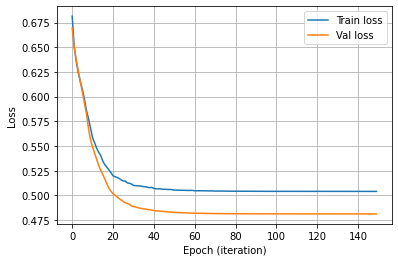

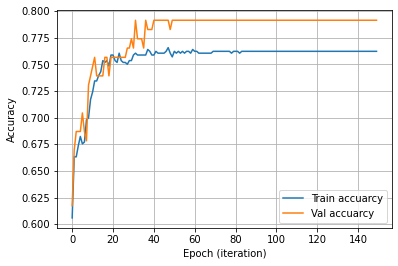

In [49]:
#Loss and accuracy plots
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Val loss")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.plot(history.history['accuracy'], label = "Train accuarcy")
plt.plot(history.history['val_accuracy'], label = "Val accuarcy")
plt.xlabel("Epoch (iteration)")
plt.ylabel("Accuracy")
plt.legend()
plt.grid()
plt.show()

In [50]:
#model testing
#model.load_weights('team_13_FCN_Diabetes.h5')
Y_pred = model.predict(X_test).argmax(axis=1)
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
cm = confusion_matrix(Y_test, Y_pred)

print('TP - True Positive {}'.format(cm[0,0]))
print('FP - False Positive {}'.format(cm[0,1]))
print('FN - False Negative {}'.format(cm[1,0]))
print('TN - True Negative {}'.format(cm[1,1]))
print('Accuracy Rate: {}'.format(np.divide(np.sum([cm[0,0],cm[1,1]]),np.sum(cm))))
print('Misclassification Rate: {}'.format(np.divide(np.sum([cm[0,1],cm[1,0]]),np.sum(cm))))
print(classification_report(Y_test, Y_pred))
print("ROC_AUC Score:",round(roc_auc_score(Y_test,Y_pred),5))
print('Recall:',recall_score(Y_test,Y_pred))
print('Precsion:',precision_score(Y_test,Y_pred))

TP - True Positive 43
FP - False Positive 3
FN - False Negative 16
TN - True Negative 15
Accuracy Rate: 0.7532467532467533
Misclassification Rate: 0.24675324675324675
              precision    recall  f1-score   support

           0       0.73      0.93      0.82        46
           1       0.83      0.48      0.61        31

    accuracy                           0.75        77
   macro avg       0.78      0.71      0.72        77
weighted avg       0.77      0.75      0.74        77

ROC_AUC Score: 0.70933
Recall: 0.4838709677419355
Precsion: 0.8333333333333334


##  Contributions

- **Archi** helped with data exploration and distribution (**score 3**)
- **Anita** alongwith pravallika worked on model evaluation (**score 3**)
- **Kishan** helped design the FNN model with testing (**score 3**)
- **Pravallika** helped alongwith Anita worked on model evaluation (**score 3**)
- **Vrunda** worked on deciding hyperparameters (**score 3**)

# Thank you. 
